# Project 5: Predicting Customer Profitability Dynamically over Time: An Experimental Comparative Study

## RFM Model

Customer profitability is measured by Recency, Frequency, and Monetary (RFM) model.
- Recency: How recently a customer has made a purchase
- Frequency: How often a customer makes a purchase
- Monetary Value: How much money a customer spends on purchases

__How Calclulate RMF Value:__
- calculate Recency = number of days since last purchase
- calculate Freqency = number of purchases during the studied period (usually one year)
- calculate Monetary = total amount of purchases made during the studied period

__Dataset:__

[Retail](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) dataset. This is a transnational data set which contains all (541,909) the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

**DataSet Load**

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("online_retail_II.xlsx")


Let's look at the some data

In [2]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [3]:
data.tail(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525451,538171,22748,POPPY'S PLAYHOUSE KITCHEN,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525452,538171,22745,POPPY'S PLAYHOUSE BEDROOM,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525453,538171,22558,CLOTHES PEGS RETROSPOT PACK 24,4,2010-12-09 20:01:00,1.49,17530.0,United Kingdom
525454,538171,21671,RED SPOT CERAMIC DRAWER KNOB,6,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525455,538171,20971,PINK BLUE FELT CRAFT TRINKET BOX,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


**Select United Kingdon Data**

In [4]:
uk_data=data[data['Country']=='United Kingdom']
uk_data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


**Delete NaN Values and Negative Values**


In [5]:
len(uk_data[uk_data['Price']<0])

3

Look the number of null value per column

In [6]:
uk_data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    106429
Country             0
dtype: int64

In [7]:
uk_data = uk_data[pd.notnull(uk_data['Customer ID'])]

In [8]:
uk_data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
uk_data.describe()

,Quantity,Price,Customer ID
count,379423.000000,379423.000000,379423.000000
mean,11.451517,3.653249,15559.935694
std,68.943709,68.743746,1593.744626
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,14210.000000
50%,4.000000,1.950000,15581.000000
75%,12.000000,3.750000,16938.000000
max,10000.000000,25111.090000,18287.000000


**Select Columns to Calculate RFM**

In [10]:
uk_data1 = uk_data[['Customer ID','Invoice','Quantity','Price']]
uk_data1.describe()

,Customer ID,Quantity,Price
count,379423.000000,379423.000000,379423.000000
mean,15559.935694,11.451517,3.653249
std,1593.744626,68.943709,68.743746
min,12346.000000,-9360.000000,0.000000
25%,14210.000000,2.000000,1.250000
50%,15581.000000,4.000000,1.950000
75%,16938.000000,12.000000,3.750000
max,18287.000000,10000.000000,25111.090000


In [11]:
uk_data2 = uk_data.drop(columns=['StockCode', 'Description','InvoiceDate'])
uk_data2.describe()

,Quantity,Price,Customer ID
count,379423.000000,379423.000000,379423.000000
mean,11.451517,3.653249,15559.935694
std,68.943709,68.743746,1593.744626
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,14210.000000
50%,4.000000,1.950000,15581.000000
75%,12.000000,3.750000,16938.000000
max,10000.000000,25111.090000,18287.000000


I choose more meaningful columns to segment the customers.

In [12]:
uk_data = uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']]
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']
uk_data.head(10)

,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPrice
0,13085.0,2009-12-01 07:45:00,489434,12,6.95,83.4
1,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
2,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
3,13085.0,2009-12-01 07:45:00,489434,48,2.10,100.8
4,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0
5,13085.0,2009-12-01 07:45:00,489434,24,1.65,39.6
6,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0
7,13085.0,2009-12-01 07:45:00,489434,10,5.95,59.5
8,13085.0,2009-12-01 07:46:00,489435,12,2.55,30.6
9,13085.0,2009-12-01 07:46:00,489435,12,3.75,45.0


Group by Invoice No and Data and Customer ID

In [13]:
orders = uk_data.groupby(['Invoice', 'InvoiceDate', 'Customer ID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,Invoice,InvoiceDate,Customer ID,TotalPrice
0,489434,2009-12-01 07:45:00,13085.0,505.30
1,489435,2009-12-01 07:46:00,13085.0,145.80
2,489436,2009-12-01 09:06:00,13078.0,630.33
3,489437,2009-12-01 09:08:00,15362.0,310.75
4,489438,2009-12-01 09:24:00,18102.0,2286.24


**Calculate RFM Value**

In [14]:
from datetime import timedelta
NOW = orders['InvoiceDate'].max() + timedelta(days=1)
print("now=",NOW)

now= 2010-12-10 20:01:00


In [15]:
orders['DaysSinceOrder'] = orders['InvoiceDate'].apply(lambda x: (NOW - x).days)

In [16]:
print(orders['InvoiceDate'].min())
print(orders['InvoiceDate'].max())

2009-12-01 07:45:00
2010-12-09 20:01:00


In [17]:
period = 360 #studed period

In [18]:

aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'InvoiceDate': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}
rfm = orders.groupby('Customer ID').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'InvoiceDate': 'Frequency'}, inplace=True)
rfm.head()

,Customer ID,Recency,Frequency
0,12346.0,67,12
1,12608.0,40,1
2,12745.0,122,2
3,12746.0,163,2
4,12747.0,5,19


In [19]:

rfm['Monetary'] = rfm['Customer ID'].apply(lambda x: orders[(orders['Customer ID'] == x) & \
                                                           (orders['InvoiceDate'] >= NOW - timedelta(days=period))]\
                                                           ['TotalPrice'].sum())
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,67,12,-154.68
1,12608.0,40,1,415.79
2,12745.0,122,2,723.85
3,12746.0,163,2,242.75
4,12747.0,5,19,4316.53


**Plot the Value**


In [20]:
rfm.describe()

,Customer ID,Recency,Frequency,Monetary
count,4035.000000,4035.000000,4035.000000,4035.000000
mean,15561.545725,91.378439,4.992069,1624.672231
std,1582.617884,98.335360,8.563504,6403.256477
min,12346.000000,1.000000,0.000000,-25111.090000
25%,14198.500000,17.000000,1.000000,256.575000
50%,15583.000000,52.000000,3.000000,611.550000
75%,16943.500000,138.000000,6.000000,1477.675000
max,18287.000000,374.000000,155.000000,303843.030000


**Draw Histogram**

In [21]:
import matplotlib.pyplot as plt


As you see, the Recency, Frequency, Monetary histogram is not good
Transform and scale the data

Customer ID       AxesSubplot(0.125,0.125;0.168478x0.755)
Recency        AxesSubplot(0.327174,0.125;0.168478x0.755)
Frequency      AxesSubplot(0.529348,0.125;0.168478x0.755)
Monetary       AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

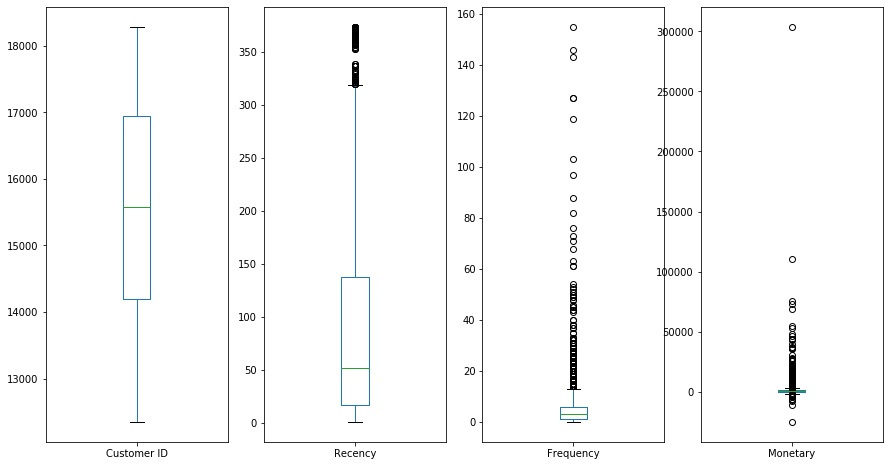

In [22]:
plt.rcParams['axes.unicode_minus']=False
rfm.plot(kind='box',sharey=False,sharex=False,subplots=True,figsize=(15,8))

clear data Monetary>20000 and Frequency>140

In [23]:
rfm=rfm[rfm['Monetary']<=20000]
rfm=rfm[rfm['Frequency']<=140]

Look at the histogram

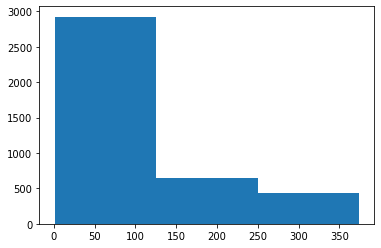

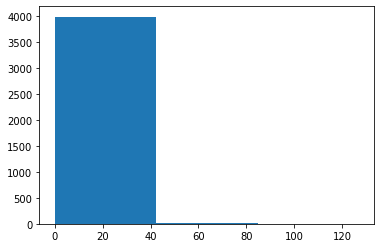

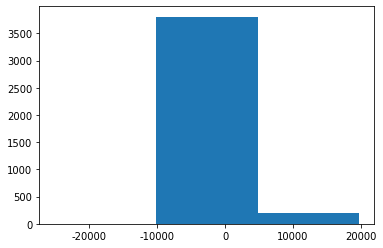

In [24]:
plt.hist(rfm['Recency'], bins = 3)
plt.show()
plt.hist(rfm['Frequency'], bins = 3)
plt.show()
plt.hist(rfm['Monetary'], bins = 3)
plt.show()

## K-Means

Look at how many clusters is good.

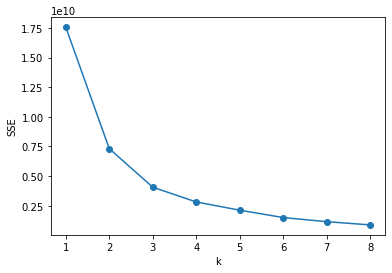

In [25]:
from sklearn.cluster import KMeans

SSE=[]

for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(rfm[['Recency','Frequency','Monetary']])
    SSE.append(estimator.inertia_)
X=range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

As you see K=3 is also good

Preprocess the data

In [26]:
rfm_z = rfm.iloc[:,1:4]
rfm_z = (rfm_z-rfm_z.mean())/rfm_z.std()
rfm_z.head()

,Recency,Frequency,Monetary
0,-0.254092,1.216992,-0.675635
1,-0.528333,-0.584037,-0.403026
2,0.304547,-0.420307,-0.255815
3,0.720988,-0.420307,-0.485716
4,-0.883831,2.363101,1.461007


In [27]:
k=3 #cluster set to 3

kmodel = KMeans(k)
kmodel.fit(rfm_z)

print(kmodel.cluster_centers_)
print(kmodel.labels_)


[[-0.48039713 -0.0851217  -0.10912226]
 [-0.70582369  2.43025802  2.59529377]
 [ 1.56224203 -0.49712873 -0.47974477]]
[0 0 0 ... 2 0 0]


Merge datas

In [28]:

number_out = pd.concat([rfm,pd.Series(kmodel.labels_,index=rfm.index,name='Type')],axis=1)
number_out.head(10)

,Customer ID,Recency,Frequency,Monetary,Type
0,12346.0,67,12,-154.68,0
1,12608.0,40,1,415.79,0
2,12745.0,122,2,723.85,0
3,12746.0,163,2,242.75,2
4,12747.0,5,19,4316.53,1
6,12749.0,21,8,2460.29,0
7,12777.0,93,1,519.45,0
8,12819.0,94,1,540.52,0
9,12820.0,33,8,1557.30,0
10,12821.0,247,1,128.08,2


**Result Analysis**

Draw Desity Function

**Type 0 Users**

In [29]:
import seaborn as sns

rmf_type_0=number_out[number_out['Type']==0]
rmf_type_0.head(10)

,Customer ID,Recency,Frequency,Monetary,Type
0,12346.0,67,12,-154.68,0
1,12608.0,40,1,415.79,0
2,12745.0,122,2,723.85,0
6,12749.0,21,8,2460.29,0
7,12777.0,93,1,519.45,0
8,12819.0,94,1,540.52,0
9,12820.0,33,8,1557.30,0
13,12826.0,1,8,1460.57,0
15,12831.0,99,2,236.06,0
17,12836.0,25,12,3509.74,0


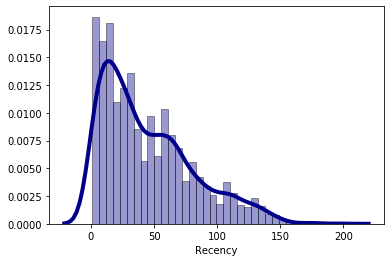

In [30]:
sns.distplot(rmf_type_0['Recency'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

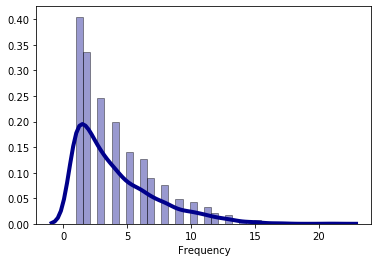

In [31]:
sns.distplot(rmf_type_0['Frequency'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

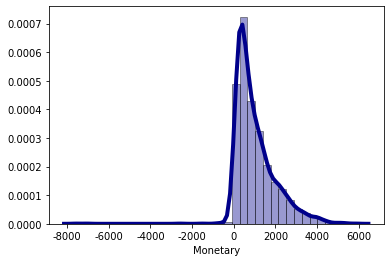

In [32]:
sns.distplot(rmf_type_0['Monetary'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

The Type 0 User have such features.
- Recency is range(0~150)
- Frequency is range (2~4)
- Monetary is smaller than 4000

**Type 1 Users**

In [33]:
rmf_type_1=number_out[number_out['Type']==1]
rmf_type_1.head(10)

,Customer ID,Recency,Frequency,Monetary,Type
4,12747.0,5,19,4316.53,1
11,12823.0,30,13,4742.00,1
16,12835.0,54,45,5047.76,1
20,12839.0,3,14,3690.97,1
22,12841.0,5,18,3514.08,1
24,12843.0,18,24,4588.01,1
78,12921.0,2,50,16576.31,1
91,12939.0,15,12,13683.00,1
99,12949.0,18,17,9453.28,1
114,12971.0,2,33,4491.03,1


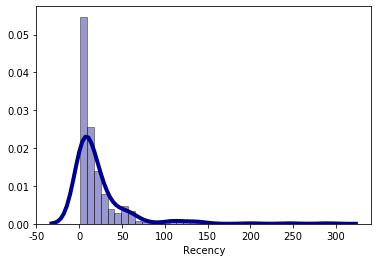

In [34]:
sns.distplot(rmf_type_1['Recency'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

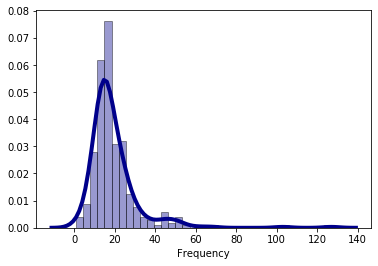

In [35]:
sns.distplot(rmf_type_1['Frequency'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

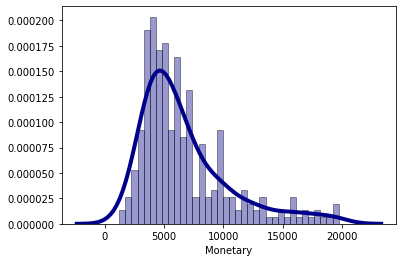

In [36]:
sns.distplot(rmf_type_1['Monetary'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Type 1 User has such features:
- Recency is range (5,20)
- Frequency is range (10,30)
- Monetary is range (500,20000)

**Type 2 User**


In [37]:

rmf_type_2=number_out[number_out['Type']==2]
rmf_type_2.head(10)

,Customer ID,Recency,Frequency,Monetary,Type
3,12746.0,163,2,242.75,2
10,12821.0,247,1,128.08,2
12,12825.0,157,2,518.63,2
14,12829.0,186,1,92.30,2
18,12837.0,205,1,554.31,2
26,12846.0,318,1,15.58,2
28,12848.0,311,1,208.00,2
33,12854.0,197,5,1107.88,2
38,12860.0,329,1,55.47,2
39,12861.0,255,1,68.25,2


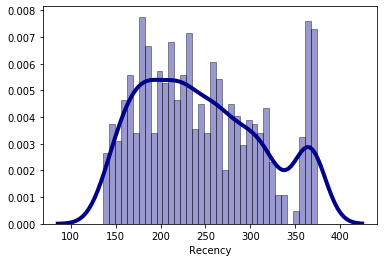

In [38]:
sns.distplot(rmf_type_2['Recency'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

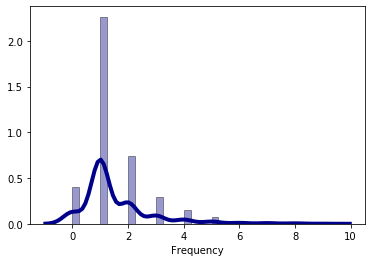

In [39]:
sns.distplot(rmf_type_2['Frequency'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

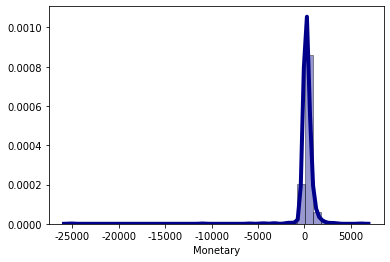

In [40]:
sns.distplot(rmf_type_2['Monetary'],kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Type 2 User has such features:
- Recency is range (150,350)
- Frequency is range (1,2)
- Monetary is range (0~500)

## Conclusion

The Type 0 User have such features.
- Recency is range(0~150)
- Frequency is range (2~4)
- Monetary is smaller than 4000

Type 1 User has such features:
- Recency is range (5,20)
- Frequency is range (10,30)
- Monetary is range (500,20000)

Type 2 User has such features:
- Recency is range (150,350)
- Frequency is range (1,2)
- Monetary is range (0~500)